# &#x1F4D1; &nbsp;  Build  a  Digit Recognition Models

## Links
Multi-dimensional image processing https://docs.scipy.org/doc/scipy/reference/ndimage.html

Keras: Deep Learning library for Theano and TensorFlow https://keras.io/
 
Deep MNIST for Experts https://www.tensorflow.org/get_started/mnist/pros

Tensorflow Deep MNIST Advanced Tutorial http://docs.seldon.io/tensorflow-deep-mnist-example.html

Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras

http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

## Libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from time import time

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import matplotlib.cm as cm

%matplotlib inline

In [385]:
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model, neighbors, svm, ensemble
from sklearn import datasets, metrics 
from sklearn.model_selection import train_test_split

In [200]:
import keras as ks
from keras.models import Sequential, load_model, Model
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers.embeddings import Embedding
from keras.layers.advanced_activations import PReLU

## Dataset

In [4]:
df_train = pd.read_csv("kaggle_train.csv")
df_test = pd.read_csv("kaggle_test.csv")

In [5]:
df_train.shape

(42000, 785)

In [18]:
df_train.ix[15:20,15:20]

,pixel14,pixel15,pixel16,pixel17,pixel18
15,0,0,0,0,0
16,0,0,0,0,0
17,0,0,0,0,0
18,0,0,0,0,0
19,0,0,0,0,0
20,0,0,0,0,0


In [7]:
images = ["%s%s" %("pixel",pixel_no) for pixel_no in range(0,784)]
train_images = np.array(df_train[images])
train_images.shape

(42000, 784)

In [8]:
train_labels = df_train['label']
train_labels10 = np.array(ks.utils.to_categorical(train_labels, num_classes=10))
train_labels10.shape

(42000, 10)

In [9]:
test_images = np.array(df_test[images])
test_images.shape

(28000, 784)

In [10]:
test_images2 = test_images/255

In [11]:
train_images28 = np.array([np.reshape(x, (28, 28)) for x in train_images])
test_images28 = np.array([np.reshape(x, (28, 28)) for x in test_images])
train_images28n = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images28n = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train_images28n, train_labels10, 
                                                    test_size=0.20, random_state=32)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_images/255, train_labels10, 
                                                        test_size=0.20, random_state=32)

In [15]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((33600, 784), (8400, 784), (33600, 10), (8400, 10))

In [16]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(train_images/255, train_labels, 
                                                        test_size=0.20, random_state=32)

In [20]:
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((33600, 784), (8400, 784), (33600,), (8400,))

## Examples

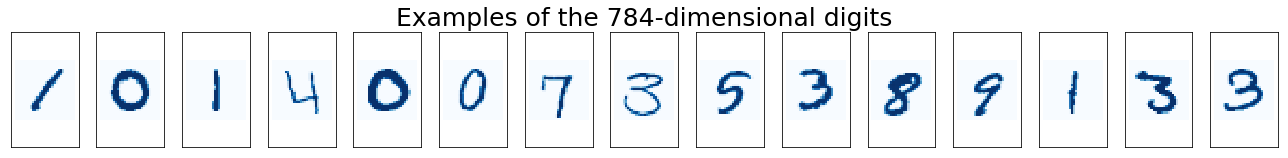

In [19]:
fig, ax = plt.subplots(figsize=(18, 2), nrows=1, ncols=15, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(15):
    image = train_images28[i]
    ax[i].imshow(image, cmap=plt.cm.Blues)

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.gcf()
ax[7].set_title('Examples of the 784-dimensional digits', fontsize=25);

## Neural Network Models

***Model #1. Convolutional Neural Network. Keras***

In [349]:
def cnn_mc_model():
    model_input = Input(shape=(28, 28, 1))
    x = BatchNormalization()(model_input)
    
    x = Conv2D(28, (5, 5), activation='relu', border_mode='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    
    x = Conv2D(56, (5, 5), activation='relu')(x)
    x = MaxPooling2D(strides=(2, 2))(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    
    x = Dense(196, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    y = Dense(10, activation='softmax')(x)
    
    model = Model(input=model_input, output=y)
    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
    
    return model

In [350]:
cnn_mc_model = cnn_mc_model()

fit11 = cnn_mc_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                         epochs=30, batch_size=196, verbose=2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
80s - loss: 0.3284 - acc: 0.8946 - val_loss: 0.0650 - val_acc: 0.9807
Epoch 2/30
78s - loss: 0.0910 - acc: 0.9727 - val_loss: 0.0539 - val_acc: 0.9839
Epoch 3/30
78s - loss: 0.0668 - acc: 0.9793 - val_loss: 0.0328 - val_acc: 0.9894
Epoch 4/30
75s - loss: 0.0538 - acc: 0.9827 - val_loss: 0.0294 - val_acc: 0.9914
Epoch 5/30
76s - loss: 0.0474 - acc: 0.9855 - val_loss: 0.0331 - val_acc: 0.9898
Epoch 6/30
83s - loss: 0.0413 - acc: 0.9869 - val_loss: 0.0278 - val_acc: 0.9919
Epoch 7/30
79s - loss: 0.0353 - acc: 0.9890 - val_loss: 0.0278 - val_acc: 0.9925
Epoch 8/30
76s - loss: 0.0350 - acc: 0.9891 - val_loss: 0.0279 - val_acc: 0.9915
Epoch 9/30
74s - loss: 0.0305 - acc: 0.9900 - val_loss: 0.0275 - val_acc: 0.9921
Epoch 10/30
70s - loss: 0.0293 - acc: 0.9909 - val_loss: 0.0267 - val_acc: 0.9930
Epoch 11/30
71s - loss: 0.0304 - acc: 0.9900 - val_loss: 0.0252 - val_acc: 0.9931
Epoch 12/30
73s - loss: 0.0264 - acc: 0.9913 - val_loss: 0

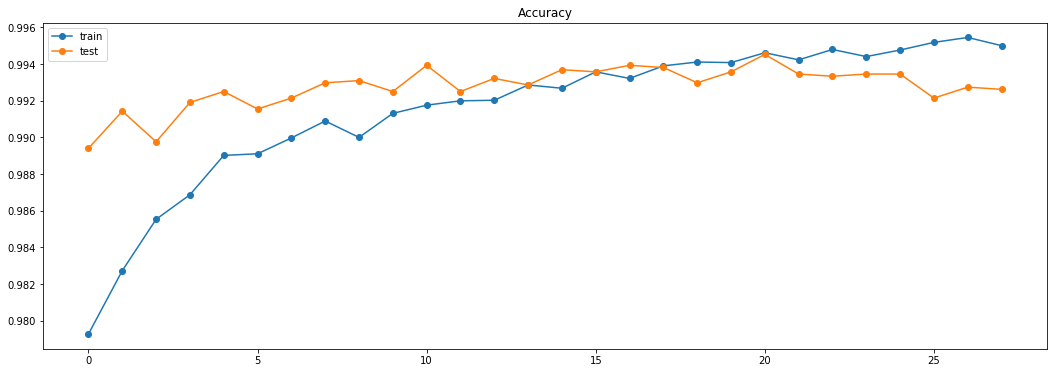

In [351]:
plt.figure(figsize=(18,6))
plt.plot(fit11.history['acc'][2:], '-o', label = 'train')
plt.plot(fit11.history['val_acc'][2:], '-o', label = 'test')
plt.legend()
plt.title('Accuracy');

In [352]:
cnn_scores = cnn_mc_model.evaluate(X_test, y_test, verbose=0)

print("CNN Scores: " , (cnn_scores))
print("CNN Error: %.2f%%" % (100 - cnn_scores[1]*100))
print(cnn_mc_model.summary())

CNN Scores:  [0.02774824293760492, 0.99261904761904762]
CNN Error: 0.74%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 28)        728       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 28)        0         
_________________________________________________________________
dropout_75 (Dropout)         (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 56)        39256     
_________________________________________________________________
max

In [353]:
cnn_mc_model.save('kaggle_digits_cnn_mc_model_file4.h5')

***Model #2. Multi-layer Perceptron. Keras***

In [ ]:
"""
def mlp_mc_model():
    model_input = Input(shape=(784,))
    x = BatchNormalization()(model_input)   

    x = Dense(784, activation='relu')(x)    
    x = Dropout(0.5)(x)

    x = Dense(784, activation='relu')(x)
    x = Dropout(0.5)(x)

    y = Dense(10, activation='softmax')(x)
    
    model = Model(input=model_input, output=y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
"""
""""""

In [333]:
def mlp_mc_model():
    model = Sequential()
    
    model.add(Dense(392, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.25))

    model.add(Dense(784, activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [334]:
mlp_mc_model = mlp_mc_model()    

fit12 = mlp_mc_model.fit(X_train2, y_train2, validation_data=(X_test2, y_test2), 
                         epochs=50, batch_size=196, verbose=2);

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
20s - loss: 0.3262 - acc: 0.8980 - val_loss: 0.2203 - val_acc: 0.9305
Epoch 2/50
8s - loss: 0.1275 - acc: 0.9604 - val_loss: 0.1119 - val_acc: 0.9660
Epoch 3/50
8s - loss: 0.0927 - acc: 0.9706 - val_loss: 0.1222 - val_acc: 0.9661
Epoch 4/50
7s - loss: 0.0726 - acc: 0.9759 - val_loss: 0.0954 - val_acc: 0.9726
Epoch 5/50
8s - loss: 0.0610 - acc: 0.9799 - val_loss: 0.1080 - val_acc: 0.9701
Epoch 6/50
8s - loss: 0.0538 - acc: 0.9823 - val_loss: 0.0920 - val_acc: 0.9750
Epoch 7/50
7s - loss: 0.0460 - acc: 0.9843 - val_loss: 0.0958 - val_acc: 0.9739
Epoch 8/50
7s - loss: 0.0390 - acc: 0.9870 - val_loss: 0.0973 - val_acc: 0.9738
Epoch 9/50
7s - loss: 0.0394 - acc: 0.9863 - val_loss: 0.0889 - val_acc: 0.9779
Epoch 10/50
7s - loss: 0.0342 - acc: 0.9886 - val_loss: 0.0956 - val_acc: 0.9770
Epoch 11/50
7s - loss: 0.0358 - acc: 0.9876 - val_loss: 0.0999 - val_acc: 0.9768
Epoch 12/50
7s - loss: 0.0349 - acc: 0.9888 - val_loss: 0.0851 - val

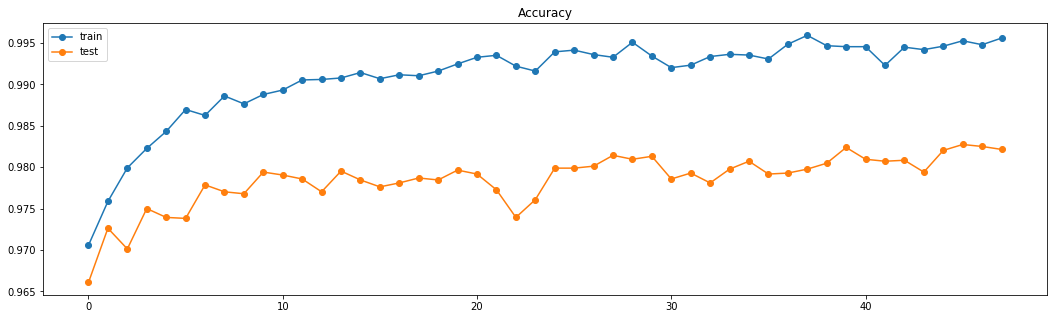

In [335]:
plt.figure(figsize=(18,5))
plt.plot(fit12.history['acc'][2:], '-o', label = 'train')
plt.plot(fit12.history['val_acc'][2:], '-o', label = 'test')
plt.legend()
plt.title('Accuracy');

In [337]:
mlp_scores = mlp_mc_model.evaluate(X_test2, y_test2)
print("\nMLP Scores: ", (mlp_scores))
print("MLP Error: %.2f%%" % (100 - mlp_scores[1] * 100))
print(mlp_mc_model.summary())

8096/8400 [===========================>..] - ETA: 0s

In [338]:
mlp_mc_model.save('kaggle_digits_mlp_mc_model_file4.h5')

***Model #3. Recurrent Neural Network. Keras***

In [265]:
def rnn_mc_model():
    model = Sequential()

    model.add(LSTM(196, return_sequences=True, input_shape=(1, 784)))
    
    model.add(LSTM(196, return_sequences=True))
    
    model.add(LSTM(196))  
    
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])    
    return model 

In [266]:
rnn_mc_model = rnn_mc_model()
fit13 = rnn_mc_model.fit(X_train2.reshape(X_train2.shape[0], 1, X_train2.shape[1]), y_train2, 
                         epochs=10, batch_size=256, verbose=2,
                         validation_data=(X_test2.reshape(X_test2.shape[0], 1, X_test2.shape[1]), y_test2))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
30s - loss: 0.5014 - acc: 0.8471 - val_loss: 0.2523 - val_acc: 0.9205
Epoch 2/10
22s - loss: 0.1518 - acc: 0.9535 - val_loss: 0.2327 - val_acc: 0.9252
Epoch 3/10
21s - loss: 0.0953 - acc: 0.9706 - val_loss: 0.1106 - val_acc: 0.9664
Epoch 4/10
21s - loss: 0.0619 - acc: 0.9808 - val_loss: 0.1604 - val_acc: 0.9519
Epoch 5/10
21s - loss: 0.0435 - acc: 0.9865 - val_loss: 0.1062 - val_acc: 0.9689
Epoch 6/10
22s - loss: 0.0306 - acc: 0.9903 - val_loss: 0.0923 - val_acc: 0.9742
Epoch 7/10
22s - loss: 0.0213 - acc: 0.9936 - val_loss: 0.1136 - val_acc: 0.9701
Epoch 8/10
22s - loss: 0.0213 - acc: 0.9932 - val_loss: 0.0933 - val_acc: 0.9746
Epoch 9/10
21s - loss: 0.0159 - acc: 0.9949 - val_loss: 0.0833 - val_acc: 0.9788
Epoch 10/10
22s - loss: 0.0088 - acc: 0.9974 - val_loss: 0.0870 - val_acc: 0.9794


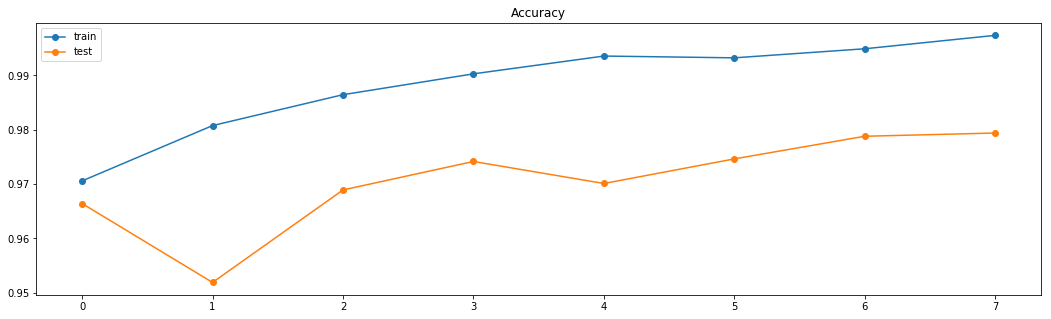

In [267]:
plt.figure(figsize=(18,5))
plt.plot(fit13.history['acc'][2:], '-o', label = 'train')
plt.plot(fit13.history['val_acc'][2:], '-o', label = 'test')
plt.legend()
plt.title('Accuracy');

In [268]:
rnn_scores = rnn_mc_model.evaluate(X_test2.reshape(X_test2.shape[0], 1, X_test2.shape[1]), y_test2)
print("\nRNN Scores: ", (rnn_scores))
print("RNN Error: %.2f%%" % (100 - rnn_scores[1] * 100))
print(rnn_mc_model.summary())

8352/8400 [============================>.] - ETA: 0s

In [269]:
rnn_mc_model.save('kaggle_digits_rnn_mc_model_file4.h5')

***Model #4. MLPClassifier. Scikit-learn***

In [308]:
clf1 = MLPClassifier(hidden_layer_sizes=(784,), max_iter=16, alpha=1e-4,
                     solver='adam', verbose=1, tol=1e-6, random_state=1,
                     learning_rate_init=7e-4, batch_size=112)
clf1.fit(X_train3, y_train3);

Iteration 1, loss = 0.33882588
Iteration 2, loss = 0.14660743
Iteration 3, loss = 0.09803284
Iteration 4, loss = 0.06931923
Iteration 5, loss = 0.05183953
Iteration 6, loss = 0.03845125
Iteration 7, loss = 0.02994105
Iteration 8, loss = 0.02101424
Iteration 9, loss = 0.01690380
Iteration 10, loss = 0.01221100
Iteration 11, loss = 0.00952089
Iteration 12, loss = 0.00848824
Iteration 13, loss = 0.00627094
Iteration 14, loss = 0.00422556
Iteration 15, loss = 0.00338273
Iteration 16, loss = 0.00290945


In [309]:
print("MNIST. MLPClassifier. Train score: %f" % (clf1.score(X_train3, y_train3)*100),'%')
print("MNIST. MLPClassifier. Test score: %f" % (clf1.score(X_test3, y_test3)*100),'%')

MNIST. MLPClassifier. Train score: 100.000000 %
MNIST. MLPClassifier. Test score: 98.023810 %


In [310]:
clf2 = MLPClassifier(hidden_layer_sizes=(784,), max_iter=30, alpha=1e-4,
                     solver='adam', verbose=1, tol=1e-6, random_state=1,
                     learning_rate_init=7e-4, batch_size=196)
clf2.fit(X_train3, y_train3);

Iteration 1, loss = 0.39448803
Iteration 2, loss = 0.17344320
Iteration 3, loss = 0.12238324
Iteration 4, loss = 0.09073830
Iteration 5, loss = 0.06954545
Iteration 6, loss = 0.05375936
Iteration 7, loss = 0.04409792
Iteration 8, loss = 0.03294099
Iteration 9, loss = 0.02668078
Iteration 10, loss = 0.02115063
Iteration 11, loss = 0.01676440
Iteration 12, loss = 0.01347168
Iteration 13, loss = 0.01065428
Iteration 14, loss = 0.00839775
Iteration 15, loss = 0.00699910
Iteration 16, loss = 0.00633210
Iteration 17, loss = 0.00521177
Iteration 18, loss = 0.00484835
Iteration 19, loss = 0.00363381
Iteration 20, loss = 0.00300214
Iteration 21, loss = 0.00268460
Iteration 22, loss = 0.00233850
Iteration 23, loss = 0.00207520
Iteration 24, loss = 0.00189111
Iteration 25, loss = 0.00173450
Iteration 26, loss = 0.00157574
Iteration 27, loss = 0.00141471
Iteration 28, loss = 0.00132738
Iteration 29, loss = 0.00124650
Iteration 30, loss = 0.00116787


In [311]:
print("MNIST. MLPClassifier #2. Train score: %f" % (clf2.score(X_train3, y_train3)*100),'%')
print("MNIST. MLPClassifier #2. Test score: %f" % (clf2.score(X_test3, y_test3)*100),'%')

MNIST. MLPClassifier #2. Train score: 100.000000 %
MNIST. MLPClassifier #2. Test score: 98.023810 %


## Classifiers

In [388]:
classifier_list = []
classifier_names = []
clf_datasets = []

acc_train, acc_test = [], []
loss_train, loss_test = [], []

In [365]:
def classifier_fit_score(classifier, classifier_name, clf_dataset, x_train, x_test, y_train, y_test):
    classifier_list.append(str(classifier))
    classifier_names.append(str(classifier_name))
    clf_datasets.append(str(clf_dataset))
    
    clf = classifier
    clf.fit(x_train, y_train)
    
    y_clf_train = clf.predict(x_train)
    y_clf_test = clf.predict(x_test)
        
    acc_clf_train = round(metrics.accuracy_score(y_train, y_clf_train), 4)
    acc_train.append(acc_clf_train)
    acc_clf_test = round(metrics.accuracy_score(y_test, y_clf_test), 4)
    acc_test.append(acc_clf_test)
    
    loss_clf_train = round(metrics.hamming_loss(y_train, y_clf_train), 4)
    loss_train.append(loss_clf_train)
    loss_clf_test = round(metrics.hamming_loss(y_test, y_clf_test), 4)
    loss_test.append(loss_clf_test)
    
    return [y_clf_train, y_clf_test, acc_clf_train, acc_clf_test, loss_clf_train, loss_clf_test]

In [366]:
def get_classifier_results():
    df_results = pd.DataFrame({'classifier' : classifier_list,
                               'classifier_name': classifier_names,
                               'clf_dataset': clf_datasets,
                               'acc_train': acc_train, 'acc_test': acc_test,
                               'loss_train': loss_train, 'loss_test': loss_test})
    
    df_list = ['classifier_name', 'acc_train', 'acc_test', 'loss_train', 'loss_test']
               
    return df_results, df_results[df_list]

In [386]:
clf1 = neighbors.KNeighborsClassifier()
clf2 = linear_model.LogisticRegressionCV() 
clf3 = ensemble.GradientBoostingClassifier()

In [368]:
y_knc_train31, y_knc_test31 = classifier_fit_score(clf1, 'KNeighborsClassifier', 'digits',
                                                   X_train3, X_test3, y_train3, y_test3)[:2]

In [375]:
y_lrcvc_train32, y_lrcvc_test32 = classifier_fit_score(clf2, 'LogisticRegressionCV', 'digits',
                                                       X_train3, X_test3, y_train3, y_test3)[:2]

In [387]:
y_gbc_train33, y_gbc_test33 = classifier_fit_score(clf3, 'GradientBoostingClassifier', 'digits',
                                                   X_train3, X_test3, y_train3, y_test3)[:2]

In [ ]:
df_results, df_results2  = get_classifier_results()
df_results2.sort_values('acc_test', ascending=False)

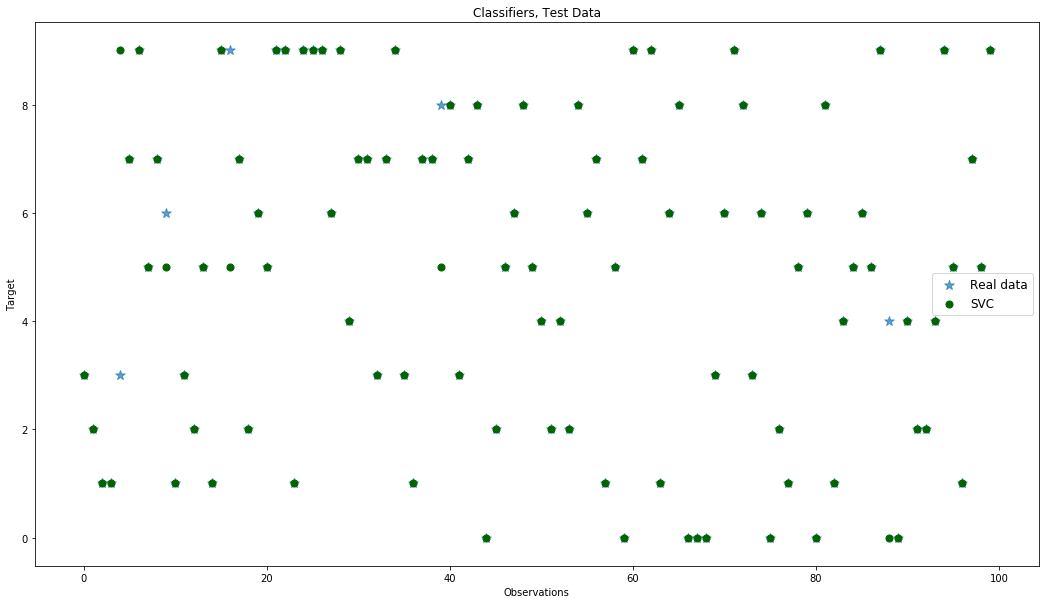

In [391]:
plt.figure(figsize=(18, 10))
n=100
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=100, alpha=0.7, label='Real data')

# plt.scatter(x, y_knc_test31[:n], marker='v', s=50, color='darkorange', label='K Neighbors Classifier')
# plt.scatter(x, y_lrcvc_test32[:n], marker='s', s=50, color='darkred', label='Logistic RegressionCV')
plt.scatter(x, y_gbc_test33[:n], marker='o', s=50, color='darkgreen', label='SVC')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Classifiers, Test Data')
plt.legend(loc=5, fontsize=12);


## Predictions

In [354]:
predict_labels1 = cnn_mc_model.predict(test_images28n)
predict_labels1 = predict_labels1.argmax(axis=-1)
predict_labels1[:100]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1,
       5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7,
       8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0,
       1, 6, 5, 8, 8, 2, 8, 9, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0,
       6, 6, 1, 4, 3, 9, 7, 4])

In [355]:
predict_labels2 = mlp_mc_model.predict_classes(test_images2)
predict_labels2[:100]

27872/28000 [============================>.] - ETA: 0s 

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1,
       5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7,
       8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0,
       1, 6, 5, 8, 8, 2, 8, 5, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0,
       6, 6, 1, 4, 3, 9, 7, 4])

In [341]:
predict_labels3 = rnn_mc_model.predict_classes(test_images2.reshape(test_images2.shape[0], 1, test_images2.shape[1]))
predict_labels3[:100]

27936/28000 [============================>.] - ETA: 0s  

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1,
       5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7,
       8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0,
       1, 6, 5, 8, 8, 2, 8, 8, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0,
       6, 6, 1, 4, 3, 9, 7, 4])

In [342]:
predict_labels4 = clf2.predict(test_images2)
predict_labels4[:100]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1,
       5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7,
       8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0,
       1, 6, 5, 8, 8, 2, 8, 8, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0,
       6, 6, 1, 4, 3, 9, 7, 4])

In [356]:
submission1 = pd.DataFrame({"ImageId": range(1, len(predict_labels1)+1), "Label": predict_labels1})
print(submission1[0:20])

submission1.to_csv('kaggle_digits_cnn_mc_model.csv', index=False)

    ImageId  Label
0         1      2
1         2      0
2         3      9
3         4      9
4         5      3
5         6      7
6         7      0
7         8      3
8         9      0
9        10      3
10       11      5
11       12      7
12       13      4
13       14      0
14       15      4
15       16      3
16       17      3
17       18      1
18       19      9
19       20      0


In [344]:
submission2 = pd.DataFrame({"ImageId": range(1, len(predict_labels2)+1), "Label": predict_labels2})
print(submission2[:20])

submission2.to_csv('kaggle_digits_mlp_mc_model.csv', index=False)

    ImageId  Label
0         1      2
1         2      0
2         3      9
3         4      9
4         5      3
5         6      7
6         7      0
7         8      3
8         9      0
9        10      3
10       11      5
11       12      7
12       13      4
13       14      0
14       15      4
15       16      3
16       17      3
17       18      1
18       19      9
19       20      0


In [345]:
submission3 = pd.DataFrame({"ImageId": range(1, len(predict_labels3)+1), "Label": predict_labels3})
print(submission3[0:20])

submission3.to_csv('kaggle_digits_rnn_mc_model.csv', index=False)

    ImageId  Label
0         1      2
1         2      0
2         3      9
3         4      9
4         5      3
5         6      7
6         7      0
7         8      3
8         9      0
9        10      3
10       11      5
11       12      7
12       13      4
13       14      0
14       15      4
15       16      3
16       17      3
17       18      1
18       19      9
19       20      0


In [346]:
submission4 = pd.DataFrame({"ImageId": range(1, len(predict_labels3)+1), "Label": predict_labels4})
print(submission4[0:20])

submission4.to_csv('kaggle_digits_mlpc_model.csv', index=False)

    ImageId  Label
0         1      2
1         2      0
2         3      9
3         4      9
4         5      3
5         6      7
6         7      0
7         8      3
8         9      0
9        10      3
10       11      5
11       12      7
12       13      4
13       14      0
14       15      4
15       16      3
16       17      3
17       18      1
18       19      9
19       20      0


In [347]:
real_data = np.array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3,
                      5, 7, 4, 0, 4, 3, 3, 1, 9, 0,
                      9, 1, 1, 5, 7, 4, 2, 7, 4, 7,
                      7, 5, 4, 2, 6, 2, 5, 5, 1, 6,
                      7, 7, 4, 9, 8, 7, 8, 2, 6, 7,
                      6, 8, 8, 3, 8, 2, 1, 2, 2, 0,
                      4, 1, 7, 0, 0, 0, 1, 9, 0, 1,
                      6, 5, 8, 8, 2, 8, 9, 9, 2, 3,
                      5, 4, 1, 0, 9, 2, 4, 3, 6, 7,
                      2, 0, 6, 6, 1, 4, 3, 9, 7, 4,
                      0, 9, 2, 0, 7, 3, 0, 5, 0, 8,
                      0, 0, 4, 7, 1, 7, 1, 1, 3, 3,
                      3, 7, 2, 8, 6, 3, 8, 7, 7, 4,
                      3, 5, 4, 0, 0, 0, 3, 1, 3, 6,
                      4, 3, 4, 5, 5, 8, 7, 4, 2, 8,
                      4, 3, 5, 6, 5, 3, 7, 5, 7, 8,
                      3, 0, 4, 5, 1, 3, 7, 6, 3, 0,
                      2, 7, 8, 6, 1, 3, 7, 4, 1, 2,
                      4, 8, 5, 2, 4, 9, 2, 1, 6, 0,
                      6, 1, 4, 9, 6, 0, 9, 7, 6, 9])

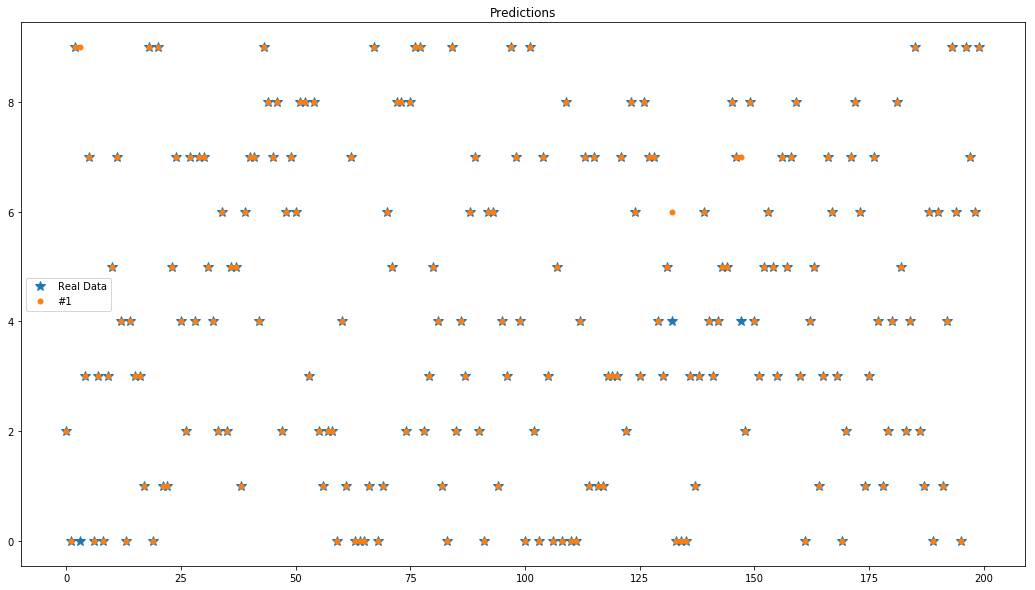

In [381]:
plt.figure(figsize = (18, 10))

plt.plot(real_data[0:200], '*', ms=10, label='Real Data')

plt.plot(submission1['Label'][0:200], 'o', ms=5, label='#1')
# plt.plot(submission2['Label'][0:200], 'v', ms=7, label='#2')
# plt.plot(submission3['Label'][0:200], 's', ms=7, label='#3')
# plt.plot(submission4['Label'][0:200], 'p', ms=7, label='#4')

plt.legend(loc=6)
plt.title("Predictions");

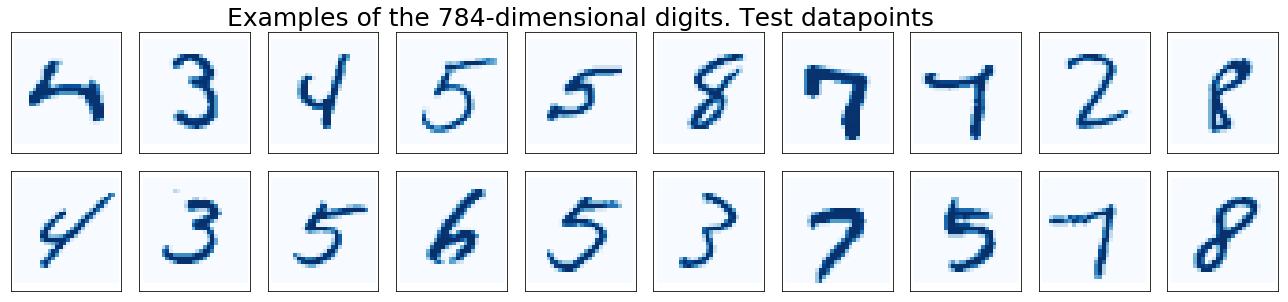

In [322]:
fig, ax = plt.subplots(figsize=(18, 4), nrows=2, ncols=10, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(20):
    image = test_images28[140:160][i]
    ax[i].imshow(image, cmap=plt.cm.Blues)

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.gcf()
ax[4].set_title('Examples of the 784-dimensional digits. Test datapoints', fontsize=25);